In [1]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import scipy.stats as ss
import statsmodels.api as sm

from sklearn.linear_model import Lasso, LassoCV 
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Set 1

In [2]:
# Set 1
set1_train = pd.read_csv("C://Users//Njula Chakaya//Downloads//Data//Online download//Set 1//Training Data.csv")
set1_test = pd.read_csv("C://Users//Njula Chakaya//Downloads//Data//Online download//Set 1//Test Data.csv")

In [3]:
#understanding the dataset
set1_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
set1_train.shape

(252000, 13)

In [5]:
set1_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [6]:
set1_test.shape

(28000, 12)

In [7]:
set1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


* The data has no null values
* There are 7 numerical values and 6 categorical values


In [8]:
set1_train.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [9]:
# Check correlation of numerical features
numerical_corr = set1_train.corr()

numerical_corr

<ipython-input-9-3134a14132d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numerical_corr = set1_train.corr()


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


<ipython-input-10-81d6a69bba39>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(numerical_corr, dtype = np.bool))


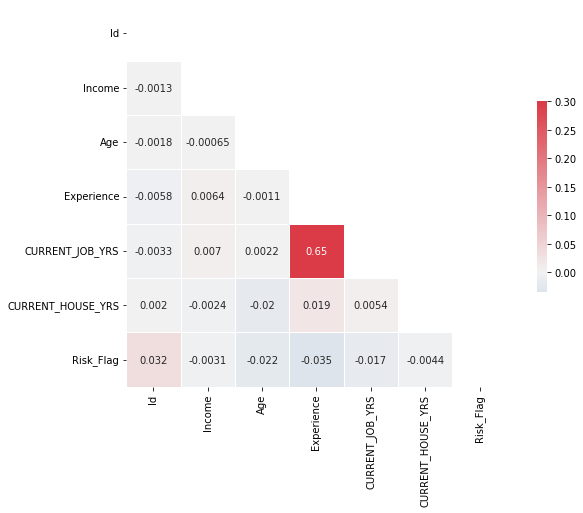

In [10]:
# Correlation heat map
fig, ax = plt.subplots(figsize = (11, 7))

mask = np.triu(np.ones_like(numerical_corr, dtype = np.bool))

cmap = sns.diverging_palette(250, 10, as_cmap= True)

sns.heatmap(numerical_corr, mask=mask, cmap=cmap, vmax = .3, center = 0, square=True, linewidths= .5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

<ipython-input-11-4b4dd36990e9>:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


Text(0.5, 1.0, 'Cramer V Correlation between Variables')

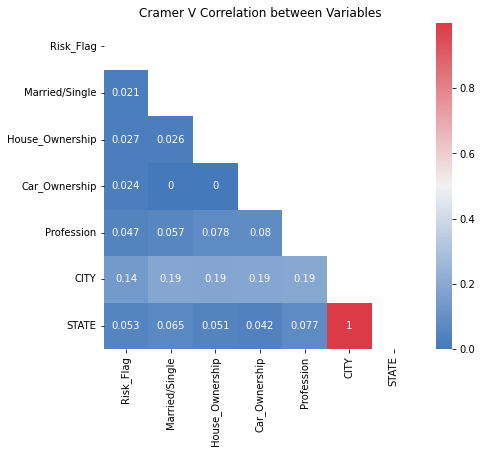

In [11]:
# Categorical correlation
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cols = ["Risk_Flag", 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession','CITY', 'STATE']
corrM = np.zeros((len(cols),len(cols)))
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(set1_train[col1], set1_train[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
    
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))

mask = np.triu(np.ones_like(corr, dtype=np.bool))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

ax = sns.heatmap(corr, mask = mask, cmap = cmap, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables")

From the correlations we can cocnlude that there is a weak realtionship between the variables and the risk flag ie defaulting and not defaulting

In [12]:
# Encoding the categorical data using one hot encoding
categorical = set1_train.select_dtypes(include= ['object']).copy()

numerical = list(set(set1_train) - set(categorical))
df_numerical = set1_train[numerical]

cat_dummies = pd.get_dummies(categorical)

encoded_data = pd.concat([df_numerical, cat_dummies], axis=1)
encoded_data.head()

,Risk_Flag,Id,Age,Income,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,0,1,23,1303834,13,3,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,40,7574516,13,9,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,66,3991815,10,4,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,41,6256451,12,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,47,5768871,14,3,11,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
# One hot encoding on test dataset
categorical_test = set1_test.select_dtypes(include=['object']).copy()
numerical_test = list(set(set1_test) - set(categorical_test))
df_numerical_test = set1_test[numerical_test]

cat_dummies_test = pd.get_dummies(categorical_test)

encoded_data_test = pd.concat([df_numerical_test, cat_dummies_test])

encoded_data_test.head(3)

,ID,CURRENT_HOUSE_YRS,Age,Income,CURRENT_JOB_YRS,Experience,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttar Pradesh[5],STATE_Uttarakhand,STATE_West Bengal
0,1.0,13.0,59.0,7393090.0,4.0,19.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,10.0,25.0,1215004.0,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,14.0,50.0,8901342.0,9.0,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
encoded_data_test.shape

(56000, 410)

In [15]:
# Seperate dependent and independent features
y = encoded_data['Risk_Flag']
X = encoded_data.drop('Risk_Flag', axis = 1)

In [16]:
# Feature selection using L1 Regularization
regressor = LassoCV()
regressor.fit(X,y)

coef_col = (regressor.coef_)
selected_features = (X.columns[(coef_col != 0)])
selected_features

Index(['Income'], dtype='object')

In [17]:
# Standardise
X = StandardScaler().fit_transform(X)

X = pd.DataFrame(X)

In [18]:
# Standardize the test data.
encoded_data_test = StandardScaler().fit_transform(encoded_data_test)

encoded_data_test = pd.DataFrame(encoded_data_test)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [20]:
# Using Logistic Regression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

[[44259     0]
 [ 6141     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     44259
           1       0.00      0.00      0.00      6141

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\Njula Chakaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Njula Chakaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Njula Chakaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_clas

In [21]:
# SMOTE for imbalanced data
smote = SMOTE(random_state= 101)

X_over, y_over = smote.fit_resample(X_train, y_train)

logistic_over = LogisticRegression()

logistic_over.fit(X_over, y_over)

y_pred_over = logistic_over.predict(X_test)

print(confusion_matrix(y_test, y_pred_over))

print(classification_report(y_test, y_pred_over))

[[25425 18834]
 [ 2370  3771]]
              precision    recall  f1-score   support

           0       0.91      0.57      0.71     44259
           1       0.17      0.61      0.26      6141

    accuracy                           0.58     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.58      0.65     50400



In [22]:
# Undersampling
X_under, y_under = RandomUnderSampler().fit_resample(X_train, y_train)

logistic_under = LogisticRegression()

logistic_under.fit(X_under, y_under)

y_pred_under = logistic_under.predict(X_test)

print(confusion_matrix(y_test, y_pred_under))

print(classification_report(y_test, y_pred_under))

[[25034 19225]
 [ 2363  3778]]
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44259
           1       0.16      0.62      0.26      6141

    accuracy                           0.57     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.57      0.65     50400



In [23]:
# Using Decision Trees
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_predc1 = classifier.predict(X_test)

print(confusion_matrix(y_test, y_predc1))

print(classification_report(y_test, y_predc1))

[[41425  2834]
 [ 3075  3066]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     44259
           1       0.52      0.50      0.51      6141

    accuracy                           0.88     50400
   macro avg       0.73      0.72      0.72     50400
weighted avg       0.88      0.88      0.88     50400



In [24]:
# Dimension reduction use 50 components for the PCA
pca = PCA(n_components=50)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [25]:
# Using tensorflow - first reduce the dimensions using PCA
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(50,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile your model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Undersampling the majority class
undersampler = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X_train_pca, y_train)

model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1243/1243 [==============================] - 3s 2ms/step - loss: 0.6480 - accuracy: 0.6298 - val_loss: 0.9362 - val_accuracy: 0.1619
Epoch 2/50
1243/1243 [==============================] - 2s 1ms/step - loss: 0.6122 - accuracy: 0.6642 - val_loss: 0.8971 - val_accuracy: 0.3184
Epoch 3/50
1243/1243 [==============================] - 2s 1ms/step - loss: 0.5827 - accuracy: 0.6951 - val_loss: 0.8112 - val_accuracy: 0.4563
Epoch 4/50
1243/1243 [==============================] - 2s 1ms/step - loss: 0.5523 - accuracy: 0.7220 - val_loss: 0.8856 - val_accuracy: 0.4391
Epoch 5/50
1243/1243 [==============================] - 2s 2ms/step - loss: 0.5274 - accuracy: 0.7429 - val_loss: 0.7955 - val_accuracy: 0.5309
Epoch 6/50
1243/1243 [==============================] - 2s 2ms/step - loss: 0.5070 - accuracy: 0.7584 - val_loss: 0.7514 - val_accuracy: 0.6151
Epoch 7/50
1243/1243 [==============================] - 2s 1ms/step - loss: 0.4924 - accuracy: 0.7725 - val_loss: 0.6946 - val_accuracy:

In [27]:
y_test_onehot = to_categorical(y_test)

y_pred_onehot = model.predict(X_test_pca)
y_pred_labels = np.argmax(y_pred_onehot, axis=1)
y_true_labels = np.argmax(y_test_onehot, axis=1)

print(classification_report(y_true_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     44259
           1       0.41      0.79      0.54      6141

    accuracy                           0.84     50400
   macro avg       0.69      0.82      0.72     50400
weighted avg       0.90      0.84      0.86     50400



In [28]:
#Predict on the test data
# Replace NaN values with mean value of feature
imputer = SimpleImputer(strategy='mean')
encoded_data_test = imputer.fit_transform(encoded_data_test)

# Apply PCA to test data
pca_test = PCA(n_components=50)
pca_test.fit(encoded_data_test)

test_pca = pca_test.transform(encoded_data_test)
prediction = model.predict(test_pca)

# Converting predicted probabilities to binary predictions
threshold = 0.5
prediction_binary = (prediction >= threshold).astype(int)

# Store values in a csv file
prediction_df = pd.DataFrame(prediction_binary, columns=['Predicted Risk Flag', 'dummy'])
prediction_df.drop(columns=['dummy'], inplace=True)

set1_result = pd.concat([set1_test, prediction_df], axis=1)

set1_result.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Predicted Risk Flag
0,1.0,7393090.0,59.0,19.0,single,rented,no,Geologist,Malda,West Bengal,4.0,13.0,0
1,2.0,1215004.0,25.0,5.0,single,rented,no,Firefighter,Jalna,Maharashtra,5.0,10.0,0
2,3.0,8901342.0,50.0,12.0,single,rented,no,Lawyer,Thane,Maharashtra,9.0,14.0,0
3,4.0,1944421.0,49.0,9.0,married,rented,yes,Analyst,Latur,Maharashtra,3.0,12.0,0
4,5.0,13429.0,25.0,18.0,single,rented,yes,Comedian,Berhampore,West Bengal,13.0,11.0,0


In [29]:
set1_result.to_csv("Set1 Prediction Results.csv")

## Set 2

In [30]:
set2_train = pd.read_csv("C://Users//Njula Chakaya//Downloads//Data//Online download//Set 2//credit_train.csv")
set2_test = pd.read_csv("C://Users//Njula Chakaya//Downloads//Data//Online download//Set 2//credit_test.csv")

In [31]:
set2_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [32]:
set2_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [33]:
set2_train.shape

(100514, 19)

In [34]:
set2_test.shape

(10353, 18)

In [35]:
set2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [36]:
set2_train['Loan Status'].value_counts(normalize= True)

Fully Paid     0.77361
Charged Off    0.22639
Name: Loan Status, dtype: float64

In [37]:
set2_train[set2_train['Loan ID'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Drop null rows in Loan ID because most are null in the other columns as well
set2_train.dropna(subset=['Loan ID'], inplace= True)

# Fill in missing values
for col in ['Credit Score', 'Annual Income', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']:
    mean = set2_train[col].mean()
    set2_train[col].fillna(mean, inplace=True)

# Fill Months since last delinquent null values with 0
set2_train['Months since last delinquent'].fillna(0, inplace= True)

# Fill in Years at current Job with mode
set2_train['Years in current job'].fillna(set2_train['Years in current job'].mode()[0], inplace= True)

In [39]:
set2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  100000 non-null  float64
 6   Annual Income                 100000 non-null  float64
 7   Years in current job          100000 non-null  object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  100000 non-null

The data has 7 categorical values and 12 Numerical Values including the targeting which is Loan Status

In [40]:
# Change the target variable into a numerical value 1 and 0 , 1 being fully paid and 0 charged off
loan_map = {'Fully Paid' : 1, 'Charged Off' : 0}
set2_train['Loan Status'] = set2_train['Loan Status'].map(loan_map)
set2_train['Loan Status'].value_counts()

1    77361
0    22639
Name: Loan Status, dtype: int64

<ipython-input-41-94dcb30fc7f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numeral = set2_train.corr()
<ipython-input-41-94dcb30fc7f1>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(numeral, dtype = np.bool))


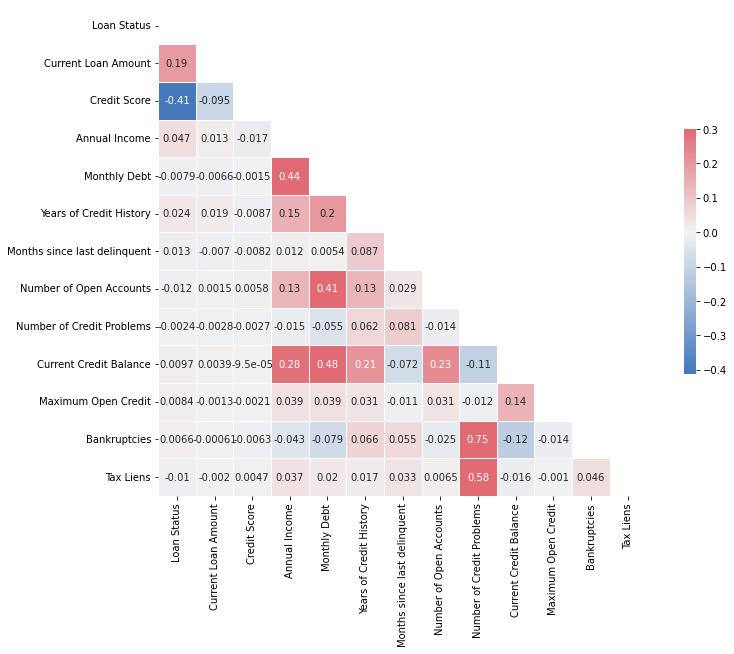

In [41]:
# Check correlation of variables
numeral = set2_train.corr()

# Correlation heat map
fig, ax = plt.subplots(figsize = (13, 9))

mask = np.triu(np.ones_like(numeral, dtype = np.bool))

cmap = sns.diverging_palette(250, 10, as_cmap= True)

sns.heatmap(numeral, mask=mask, cmap=cmap, vmax = .3, center = 0, square=True, linewidths= .5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

<ipython-input-42-dfa8c8da93cb>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


Text(0.5, 1.0, 'Cramer V Correlation between Variables')

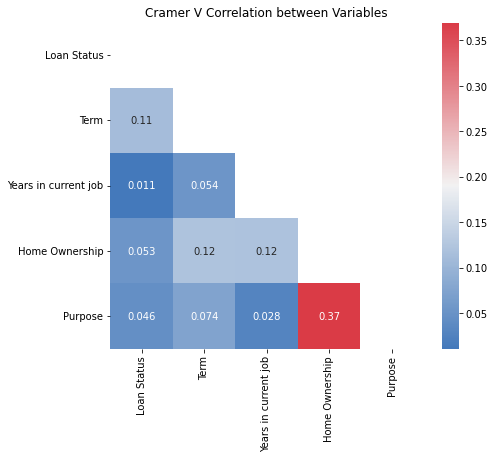

In [42]:
# Categorical Correlation
cols = ['Loan Status', "Term", 'Years in current job', 'Home Ownership' , 'Purpose']
corrM = np.zeros((len(cols),len(cols)))
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(set2_train[col1], set2_train[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
    
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))

mask = np.triu(np.ones_like(corr, dtype=np.bool))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

ax = sns.heatmap(corr, mask = mask, cmap = cmap, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables")

From the correlation Matrices, we can conclude that the following variables have a strong relationship with the Loan Status
    *Home Ownership
    *Number of credit problems
The following have a slight relationship with the Loan Status
    *Bankruptcies
    *Months since last Delinquent
    *Annual Income

In [43]:
# Drop Loan ID and Customer ID from train and test datasets
set2_train = set2_train.drop(['Loan ID', 'Customer ID'], axis=1)


In [44]:
# Encoding the categorical data using one hot encoding
category = set2_train.select_dtypes(include= ['object']).copy()

cat_dummies2 = pd.get_dummies(category)

numericals = list(set(set2_train) - set(category))
df_numericals = set2_train[numericals]

encoded_data2 = pd.concat([df_numericals, cat_dummies2], axis=1)
encoded_data2.head()

,Tax Liens,Credit Score,Bankruptcies,Current Credit Balance,Number of Open Accounts,Loan Status,Monthly Debt,Current Loan Amount,Maximum Open Credit,Annual Income,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.0,709.000000,1.0,228190.0,6.0,1,5214.74,445412.0,416746.0,1.167493e+06,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1076.456089,0.0,229976.0,35.0,1,33295.98,262328.0,850784.0,1.378277e+06,...,0,0,0,0,0,0,0,0,0,0
2,0.0,741.000000,0.0,297996.0,18.0,1,29200.53,99999999.0,750090.0,2.231892e+06,...,0,0,0,0,0,0,0,0,0,0
3,0.0,721.000000,0.0,256329.0,9.0,1,8741.90,347666.0,386958.0,8.069490e+05,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1076.456089,0.0,253460.0,15.0,1,20639.70,176220.0,427174.0,1.378277e+06,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Separate Dependent and independent variables
y2 = encoded_data2['Loan Status']
X2 = encoded_data2.drop('Loan Status', axis = 1)

In [46]:
# Feature selection using L1 Regression
regressor2 = LassoCV()
regressor2.fit(X2,y2)

coef_col2 = (regressor2.coef_)
selected_features2 = (X2.columns[(coef_col2 != 0)])
selected_features2

Index(['Current Loan Amount', 'Maximum Open Credit', 'Annual Income'], dtype='object')

In [47]:
# Standardise
X2 = StandardScaler().fit_transform(X2)

X2 = pd.DataFrame(X2)

In [48]:
# Split into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , test_size=0.2, random_state=0)

In [49]:
# Train using Logistic regression
logistic2 = LogisticRegression()
logistic2.fit(X2_train, y2_train)

y_pred2 = logistic2.predict(X2_test)

# Confusion Matrix
print(confusion_matrix(y2_test, y_pred2))

# Classification Report
print(classification_report(y2_test, y_pred2))

[[  924  3555]
 [   13 15508]]
              precision    recall  f1-score   support

           0       0.99      0.21      0.34      4479
           1       0.81      1.00      0.90     15521

    accuracy                           0.82     20000
   macro avg       0.90      0.60      0.62     20000
weighted avg       0.85      0.82      0.77     20000



In [50]:
# Train using Decision Tree
classifier2 = DecisionTreeClassifier()

classifier2.fit(X2_train, y2_train)

y_predc = classifier2.predict(X2_test)

print(confusion_matrix(y2_test, y_predc))

print(classification_report(y2_test, y_predc))

[[ 1987  2492]
 [ 2425 13096]]
              precision    recall  f1-score   support

           0       0.45      0.44      0.45      4479
           1       0.84      0.84      0.84     15521

    accuracy                           0.75     20000
   macro avg       0.65      0.64      0.64     20000
weighted avg       0.75      0.75      0.75     20000



In [51]:
# Train using tensorflow
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(45,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile your model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X2_train, y2_train, epochs=100, batch_size=32, validation_data=(X2_test, y2_test))

Epoch 1/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4414 - accuracy: 0.8158 - val_loss: 0.4276 - val_accuracy: 0.8213
Epoch 2/100
2500/2500 [==============================] - 4s 1ms/step - loss: 0.4277 - accuracy: 0.8185 - val_loss: 0.4240 - val_accuracy: 0.8214
Epoch 3/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4257 - accuracy: 0.8186 - val_loss: 0.4252 - val_accuracy: 0.8208
Epoch 4/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4240 - accuracy: 0.8185 - val_loss: 0.4227 - val_accuracy: 0.8205
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4229 - accuracy: 0.8189 - val_loss: 0.4251 - val_accuracy: 0.8214
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4217 - accuracy: 0.8197 - val_loss: 0.4239 - val_accuracy: 0.8192
Epoch 7/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4208 - accuracy: 0.8198 - val_loss: 0.4220 - val_ac

In [52]:
y_test_onehot2 = to_categorical(y2_test)

y_pred_onehot2 = model2.predict(X2_test)
y_pred_labels2 = np.argmax(y_pred_onehot2, axis=1)
y_true_labels2 = np.argmax(y_test_onehot2, axis=1)

print(classification_report(y_true_labels2, y_pred_labels2))

              precision    recall  f1-score   support

           0       0.70      0.28      0.40      4479
           1       0.82      0.97      0.89     15521

    accuracy                           0.81     20000
   macro avg       0.76      0.62      0.64     20000
weighted avg       0.79      0.81      0.78     20000



In [53]:
# Data cleaning on the test dataset
for col in ['Credit Score', 'Annual Income', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']:
    mean = set2_test[col].mean()
    set2_test[col].fillna(mean, inplace=True)

set2_test.dropna(subset=['Loan ID'], inplace= True)

set2_test['Months since last delinquent'].fillna(0, inplace= True)
set2_test['Years in current job'].fillna(set2_test['Years in current job'].mode()[0], inplace= True)

test2 = set2_test.drop(['Loan ID', 'Customer ID'], axis = 1)

In [54]:
category_test = test2.select_dtypes(include= ['object']).copy()

cat_dummies_test = pd.get_dummies(category_test)

numericals_test = list(set(test2) - set(category))
df_numericals_test = test2[numericals_test]

encoded_data2_test = pd.concat([df_numericals_test, cat_dummies_test], axis=1)


In [55]:
encoded_data2_test = StandardScaler().fit_transform(encoded_data2_test)

encoded_data2_test = pd.DataFrame(encoded_data2_test)

In [56]:
# Test on test data
prediction2 = model2.predict(encoded_data2_test)

# Converting predicted probabilities to binary predictions
threshold2 = 0.5
prediction2_binary = (prediction2 >= threshold).astype(int)

prediction2_df = pd.DataFrame(prediction2_binary, columns=['Predicted Loan Default', 'dummy'])
prediction2_df.drop(columns=['dummy'], inplace=True)

set2_result = pd.concat([set2_test, prediction2_df], axis=1)

set2_result.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Predicted Loan Default
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,0.0,9.0,0.0,621908.0,1058970.0,0.0,0.0,0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,0.0,11.0,0.0,679573.0,904442.0,0.0,0.0,0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0


In [83]:
from tensorflow import keras

model2.save("loan_model")

INFO:tensorflow:Assets written to: loan_model\assets


In [57]:
set2_result.to_csv("Set 2 Prediction Results.csv")

## Set 3

In [58]:
set3 = pd.read_csv("C://Users//Njula Chakaya//Downloads//archive (2)//german_credit_data.csv")
set3.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [59]:
set3 = set3.drop(columns='Unnamed: 0', axis=1)

In [60]:
set3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [61]:
set3.shape

(1000, 10)

In [62]:
set3["Risk"].value_counts(normalize=True)

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [63]:
#Filling in missing values
for col in ['Saving accounts', 'Checking account']:
    mode = set3[col].mode()[0]
    set3[col].fillna(mode, inplace=True)

In [64]:
# Change the target variable into a numerical value 1 and 0 , 1 being good and 0 bad
risk_map = {'good' : 1, 'bad' : 0}
set3['Risk'] = set3['Risk'].map(risk_map)
set3['Risk'].value_counts()

1    700
0    300
Name: Risk, dtype: int64

In [65]:
# Correlation
numbers = set3.corr()

numbers

<ipython-input-65-aa273e54f99f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numbers = set3.corr()


,Age,Job,Credit amount,Duration,Risk
Age,1.000000,0.015673,0.032716,-0.036136,0.091127
Job,0.015673,1.000000,0.285385,0.210910,-0.032735
Credit amount,0.032716,0.285385,1.000000,0.624984,-0.154739
Duration,-0.036136,0.210910,0.624984,1.000000,-0.214927
Risk,0.091127,-0.032735,-0.154739,-0.214927,1.000000


In [66]:
# Categrical correlation
cols = ['Risk', "Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]
corrM = np.zeros((len(cols),len(cols)))
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(set3[col1], set3[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
    
corr = pd.DataFrame(corrM, index=cols, columns=cols)

In [67]:
corr

,Risk,Sex,Housing,Saving accounts,Checking account,Purpose
Risk,0.000000,0.065969,0.127334,0.101116,0.113849,0.081497
Sex,0.065969,0.000000,0.228046,0.000000,0.000000,0.119456
Housing,0.127334,0.228046,0.000000,0.000000,0.000000,0.159854
Saving accounts,0.101116,0.000000,0.000000,0.000000,0.091667,0.028835
Checking account,0.113849,0.000000,0.000000,0.091667,0.000000,0.083261
Purpose,0.081497,0.119456,0.159854,0.028835,0.083261,0.000000


In [68]:
# Encoding the categorical data
category3 = set3.select_dtypes(include= ['object']).copy()

cat_dummies3 = pd.get_dummies(category3)

numericals3 = list(set(set3) - set(category3))
df_numericals3 = set3[numericals3]

encoded_data3 = pd.concat([df_numericals3, cat_dummies3], axis=1)

encoded_data3.head()

,Risk,Credit amount,Age,Job,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,1,1169,67,2,6,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5951,22,2,48,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,2096,49,1,12,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,7882,45,2,42,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,4870,53,2,24,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [69]:
# Separate Dependent and independent variables
y3 = encoded_data3['Risk']
X3 = encoded_data3.drop('Risk', axis = 1)

In [70]:
# Standardise
X3 = StandardScaler().fit_transform(X3)

X3 = pd.DataFrame(X3)

In [71]:
# Split into train and test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3 , test_size=0.2, random_state=0)

In [72]:
# Train using the tensorflow model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(24,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile your model
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X3_train, y3_train, epochs=100, batch_size=32, validation_data=(X3_test, y3_test))

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 0.6259 - accuracy: 0.6850 - val_loss: 0.6020 - val_accuracy: 0.7150
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.7163 - val_loss: 0.5829 - val_accuracy: 0.7150
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7262 - val_loss: 0.5785 - val_accuracy: 0.7100
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.7237 - val_loss: 0.5773 - val_accuracy: 0.7050
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5392 - accuracy: 0.7375 - val_loss: 0.5751 - val_accuracy: 0.7050
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7437 - val_loss: 0.5772 - val_accuracy: 0.7050
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7437 - val_loss: 0.5780 - val_accuracy: 0.7050
Epoch 8/100
2

In [73]:
# Undersampling the majority class
undersampler2 = RandomUnderSampler(random_state=42)

X3_resampled, y3_resampled = undersampler.fit_resample(X3_train, y3_train)

model3.fit(X3_resampled, y3_resampled, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1855 - accuracy: 0.9251 - val_loss: 0.3510 - val_accuracy: 0.7938
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1663 - accuracy: 0.9457 - val_loss: 0.2739 - val_accuracy: 0.8454
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9457 - val_loss: 0.3437 - val_accuracy: 0.8144
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9561 - val_loss: 0.3064 - val_accuracy: 0.8247
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.9638 - val_loss: 0.4479 - val_accuracy: 0.7526
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.1365 - accuracy: 0.9690 - val_loss: 0.3855 - val_accuracy: 0.8144
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.1318 - accuracy: 0.9587 - val_loss: 0.3797 - val_accuracy: 0.8041
Epoch 8/50
13/13 [==

In [74]:
# Model evaluation
y_test_onehot3 = to_categorical(y3_test)

y_pred_onehot3 = model3.predict(X3_test)
y_pred_labels3 = np.argmax(y_pred_onehot3, axis=1)
y_true_labels3 = np.argmax(y_test_onehot3, axis=1)

print(classification_report(y_true_labels3, y_pred_labels3))

              precision    recall  f1-score   support

           0       0.38      0.66      0.48        58
           1       0.80      0.56      0.66       142

    accuracy                           0.58       200
   macro avg       0.59      0.61      0.57       200
weighted avg       0.68      0.58      0.60       200



In [75]:
# Train using Logistic Regression
logistic3 = LogisticRegression()

logistic3.fit(X3_train, y3_train)

y_pred3 = logistic3.predict(X3_test)

# Confusion Matrix
print(confusion_matrix(y3_test, y_pred3))

# Classification Report
print(classification_report(y3_test, y_pred3))

[[ 13  45]
 [ 12 130]]
              precision    recall  f1-score   support

           0       0.52      0.22      0.31        58
           1       0.74      0.92      0.82       142

    accuracy                           0.71       200
   macro avg       0.63      0.57      0.57       200
weighted avg       0.68      0.71      0.67       200



In [76]:
classifier3 = DecisionTreeClassifier()

classifier3.fit(X3_train, y3_train)

y3_pred = classifier3.predict(X3_test)

print(classification_report(y3_test, y3_pred))

print(confusion_matrix(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.31      0.34      0.33        58
           1       0.72      0.69      0.71       142

    accuracy                           0.59       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.60      0.59      0.60       200

[[20 38]
 [44 98]]
